In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

In [ ]:
from sklearn.preprocessing import LabelEncoder 

In [ ]:
train =  pd.read_csv("brain_stroke.csv")

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [ ]:
train.head(3)

gender   age  hypertension  heart_disease ever_married work_type  \
0    Male  67.0             0              1          Yes   Private   
1    Male  80.0             0              1          Yes   Private   
2  Female  49.0             0              0          Yes   Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
1          Rural             105.92  32.5     never smoked       1  
2          Urban             171.23  34.4           smokes       1

In [ ]:
total = train.shape[0]
print(total);
stroke_positive = train[train['stroke'] == 1]
stroke_negative = train[train['stroke'] == 0]
stroke_positive_count = stroke_positive.shape[0];
stroke_negative_count = stroke_negative.shape[0];
print(stroke_positive_count, stroke_negative_count)
print((stroke_positive_count / total)*100,'%')
print((stroke_negative_count / total)*100, '%')

4981
248 4733
4.978919895603292 %
95.0210801043967 %


In [ ]:
print(train['gender'].unique())
print(train['ever_married'].unique())
print(train['work_type'].unique())
print(train['Residence_type'].unique())
print(train['smoking_status'].unique())

['Male' 'Female']
['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [ ]:
train['gender'][train['gender'] == 'Male'] = 0
train['gender'][train['gender'] == 'Female'] = 1

train['ever_married'][train['ever_married'] == 'Yes'] = 0
train['ever_married'][train['ever_married'] == 'No'] = 1

train['work_type'][train['work_type'] == 'Private'] = 0
train['work_type'][train['work_type'] == 'Self-employed'] = 1
train['work_type'][train['work_type'] == 'Govt_job'] = 2
train['work_type'][train['work_type'] == 'children'] = 3

train['Residence_type'][train['Residence_type'] == 'Urban'] = 0
train['Residence_type'][train['Residence_type'] == 'Rural'] = 1

train['smoking_status'][train['smoking_status'] == 'formerly smoked'] = 0
train['smoking_status'][train['smoking_status'] == 'never smoked'] = 1
train['smoking_status'][train['smoking_status'] == 'smokes'] = 2
train['smoking_status'][train['smoking_status'] == 'Unknown'] = 3

<ipython-input-9-6e329a44b1b9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['gender'][train['gender'] == 'Male'] = 0
<ipython-input-9-6e329a44b1b9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['gender'][train['gender'] == 'Female'] = 1
<ipython-input-9-6e329a44b1b9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['ever_married'][train['ever_married'] == 'Yes'] = 0
<ipython-input-9-6e329a44b1b9>:5: SettingWith

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   int64  
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   int64  
 5   work_type          4981 non-null   int64  
 6   Residence_type     4981 non-null   int64  
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   int64  
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 428.2 KB


In [ ]:
train['gender'] = pd.to_numeric(train['gender'])
train['ever_married'] = pd.to_numeric(train['ever_married'])
train['work_type'] = pd.to_numeric(train['work_type'])
train['Residence_type'] = pd.to_numeric(train['Residence_type'])
train['smoking_status'] = pd.to_numeric(train['smoking_status'])

In [ ]:
train.head(5)

gender   age  hypertension  heart_disease  ever_married  work_type  \
0       0  67.0             0              1             0          0   
1       0  80.0             0              1             0          0   
2       1  49.0             0              0             0          0   
3       1  79.0             1              0             0          1   
4       0  81.0             0              0             0          0   

   Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0               0             228.69  36.6               0       1  
1               1             105.92  32.5               1       1  
2               0             171.23  34.4               2       1  
3               1             174.12  24.0               1       1  
4               0             186.21  29.0               0       1

In [ ]:
y = train['stroke']
x = train.drop('stroke', axis = 1)

In [ ]:
print(x.shape)

(4981, 10)


In [ ]:
x2 = x;
y2 = y;

In [ ]:
x2 = x2.to_numpy()
y2 = y2.to_numpy()


In [ ]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where
counter = Counter(y)
print(counter)
# transform the dataset
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
print(x.shape)

Counter({0: 4733, 1: 248})
Counter({1: 4733, 0: 4733})
(9466, 10)


In [ ]:
print(x.shape)

(9466, 10)


In [ ]:
x, y = X,y

In [ ]:
x.head(3)

gender   age  hypertension  heart_disease  ever_married  work_type  \
0       0  67.0             0              1             0          0   
1       0  80.0             0              1             0          0   
2       1  49.0             0              0             0          0   

   Residence_type  avg_glucose_level   bmi  smoking_status  
0               0             228.69  36.6               0  
1               1             105.92  32.5               1  
2               0             171.23  34.4               2

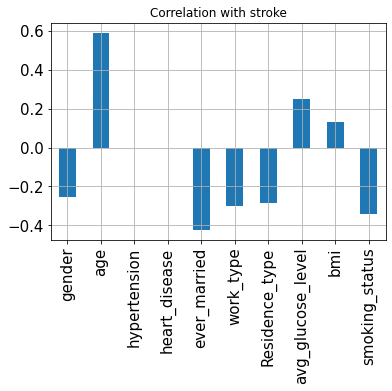

In [ ]:
x.corrwith(y).plot.bar(
         title = "Correlation with stroke", fontsize = 15,
         grid = True)

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   int64  
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   int64  
 5   work_type          4981 non-null   int64  
 6   Residence_type     4981 non-null   int64  
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 389.3 KB


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
minmax = MinMaxScaler()
x[['age']] = minmax.fit_transform(x[['age']])
x[['age']] = minmax.transform(x[['age']]) 

In [ ]:
x.head(3)

gender       age  hypertension  heart_disease  ever_married  work_type  \
0       0  0.008995             0              1             0          0   
1       0  0.010932             0              1             0          0   
2       1  0.006313             0              0             0          0   

   Residence_type  avg_glucose_level   bmi  smoking_status  
0               0             228.69  36.6               0  
1               1             105.92  32.5               1  
2               0             171.23  34.4               2

In [ ]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify=y, random_state = 12389)

In [ ]:
x_train.head(1)

gender        age  hypertension  heart_disease  ever_married  work_type  \
7875       0  70.005341             0              0             0          1   

      Residence_type  avg_glucose_level        bmi  smoking_status  
7875               0         195.471282  31.215488               0

In [ ]:
x_test.head(1)

gender       age  hypertension  heart_disease  ever_married  work_type  \
625       1  0.005717             0              0             0          0   

     Residence_type  avg_glucose_level   bmi  smoking_status  
625               1              89.21  21.6               0

In [ ]:
print(x.loc[1]);

gender                 0.000000
age                    0.010932
hypertension           0.000000
heart_disease          1.000000
ever_married           0.000000
work_type              0.000000
Residence_type         1.000000
avg_glucose_level    105.920000
bmi                   32.500000
smoking_status         1.000000
Name: 1, dtype: float64


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier

In [ ]:
logistic = LogisticRegression(random_state=0)
rf = RandomForestClassifier(criterion='gini', n_estimators=100)
SDC = SGDClassifier()
gNB = GaussianNB()

In [ ]:
logistic.fit(x_train, y_train)
rf.fit(x_train, y_train)
gNB.fit(x_train, y_train)
SDC.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SGDClassifier()

In [ ]:
def training(modelName, modelObj):
    modelObj.fit(x_train, y_train)
    kfold = KFold(n_splits=8, random_state=7, shuffle=True)
    accuracy = cross_val_score(estimator=modelObj, X=x_train,
                          y=y_train, 
                          cv=kfold,
                          scoring='accuracy')
    
    y_predict_logistic = modelObj.predict(x_test)
    print("hi");
    print(type(y_test))
    print(y_test.shape)
    print(y_predict_logistic[12])
    acc = accuracy_score(y_test, y_predict_logistic)
    return 'ModelName: '+ str(modelName) + ' Accuracy:  ' + str(round((acc * 100), 2)) + '%';

In [ ]:
logisticRes = training('Logistic Regression', logistic)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the doc

hi
<class 'pandas.core.series.Series'>
(997,)
0


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the doc

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 10.4 MB/s eta 0:00:00


In [ ]:
import shap

In [ ]:
shap.dependence_plot(1, shap_values[1], x_train, feature_names=x_train.columns)


NameError: ignored

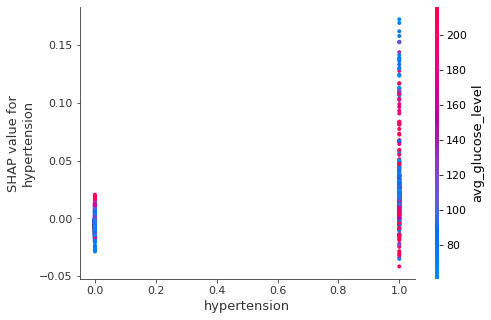

In [ ]:
shap.dependence_plot(2, shap_values[1], x_train, feature_names=x_train.columns)


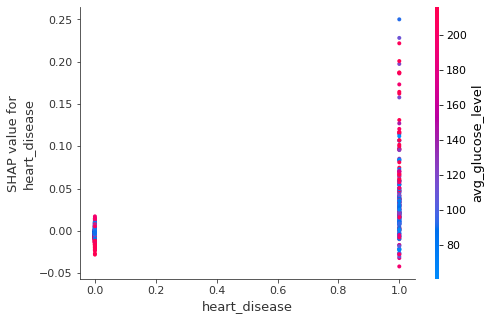

In [ ]:
shap.dependence_plot(3, shap_values[1], x_train, feature_names=x_train.columns)


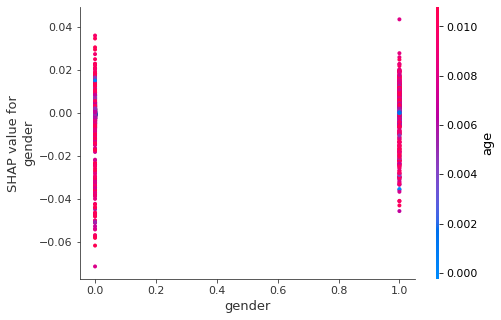

In [ ]:
shap.dependence_plot(0, shap_values[0], x_train, feature_names=x_train.columns)


In [ ]:
print(type(x_test))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
xt = x_test.to_numpy()

In [ ]:
x_test.shape

(997, 10)

In [ ]:
explainer.expected_value

array([0.95019578, 0.04980422])

In [ ]:
i = 1
shap.force_plot(explainer.expected_value[0], shap_values[0], xt[:], feature_names = x_test.columns)

shap.plots.force is slow for many thousands of rows, try subsampling your data.


IndexError: ignored

In [ ]:
x_train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

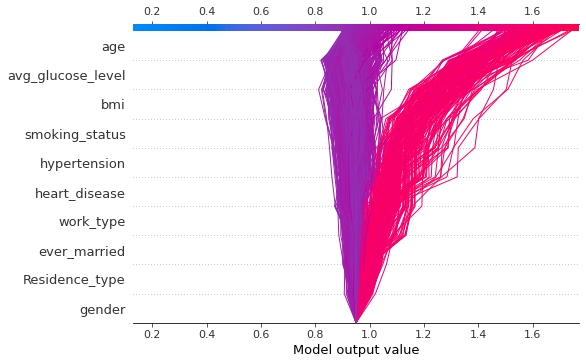

In [ ]:
shap.decision_plot(explainer.expected_value[0], shap_values[1], feature_names = list(x_train.columns), ignore_warnings=True)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
regressor = RandomForestRegressor()
regressor.fit(x_train, y_train);

In [ ]:

# Checking the model's performance on the test set
print('R2 score for the model on test set =', regressor.score(x_test, y_test))

R2 score for the model on test set = -0.028202836325237568


In [ ]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(regressor)
# Calculate Shap values
shap_values = explainer.shap_values(x_train)

In [ ]:
features= x_train.columns

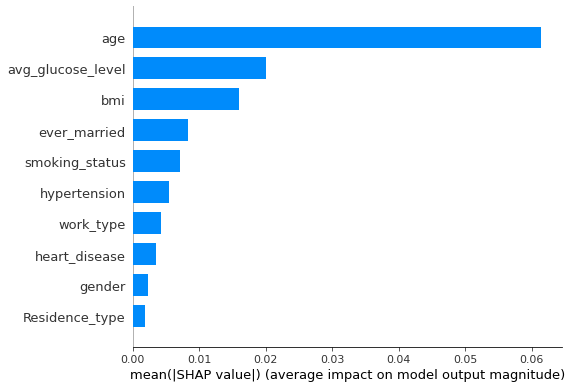

In [ ]:
shap.summary_plot(shap_values, x_train, feature_names=x_train.columns, plot_type="bar")

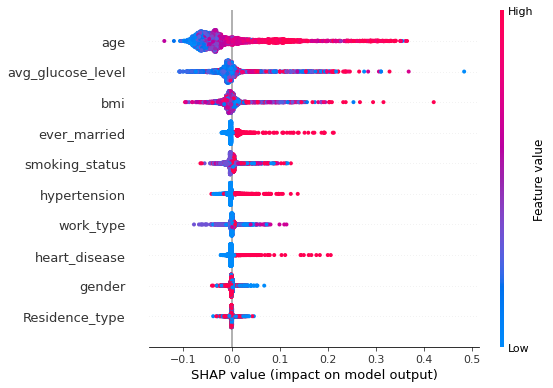

In [ ]:
shap.summary_plot(shap_values, x_train, feature_names=features)

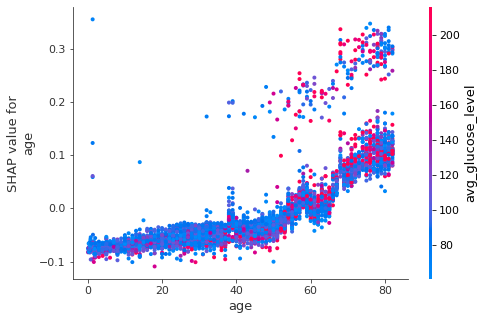

In [ ]:
shap.dependence_plot(1, shap_values, x_train, feature_names=features)

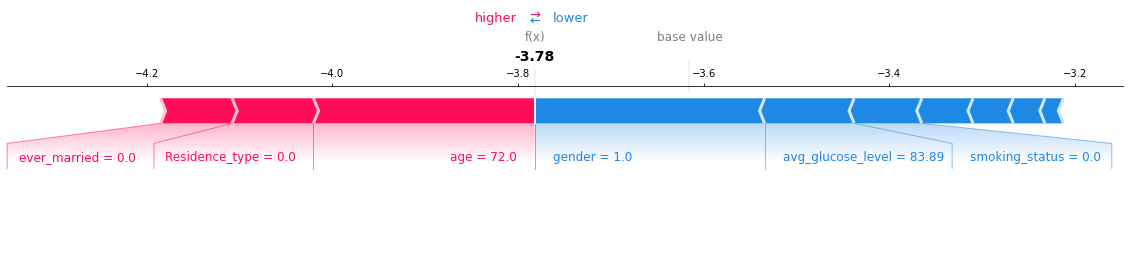

In [ ]:
i = 239  
shap.force_plot(explainer.expected_value, shap_values[i], x_train.iloc[i,:], feature_names = features,matplotlib=True)

In [ ]:
shap.decision_plot(explainer.expected_value[0], shap_values[0], feature_names = list(features))

IndexError: ignored

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor(random_state=50)
 
# Fitting the predictino model onto the training set
reg.fit(x_train, y_train)
 
# Checking the model's performance on the test set
print('R2 score for the model on test set =', reg.score(x_test, y_test))

R2 score for the model on test set = -0.11924041182682132


In [ ]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 KB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=57ddfd748805de70c2ed038aaed3a938ee1eaed385f8735253cbd478ff4b9d8b
  Stored in directory: /root/.cache/pip/wheels/e6/a6/20/cc1e293fcdb67ede666fed293cb895395e7ecceb4467779546
Successfully built lime


In [ ]:
import lime.lime_tabular
 
# Instantiating the explainer object by passing in the training set, and the extracted features
explainer_lime = lime.lime_tabular.LimeTabularExplainer(xt,
                                                        feature_names=features,
                                                        verbose=True, mode='regression')

NameError: ignored

In [ ]:
xtest = x_test.to_numpy()

In [ ]:
i = 4
 
# Number denoting the top features
k = 5
 
# Calling the explain_instance method by passing in the:
#    1) ith test vector
#    2) prediction function used by our prediction model('reg' in this case)
#    3) the top features which we want to see, denoted by k
exp_lime = explainer_lime.explain_instance(
    xtest[i], reg.predict, num_features=k)
 
# Finally visualizing the explanations
exp_lime.show_in_notebook()

X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names


Intercept 0.18489680646485065
Prediction_local [0.2018102]
Right: 0.06


In [ ]:
from sklearn import datasets, linear_model

regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_train, y_train)
 
# Checking the model's performance on the test set
print('R2 score for the model on test set =', regr.score(x_test, y_test))

R2 score for the model on test set = 0.07330125478290872


In [ ]:

from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(random_state=0)
logistic.fit(x_train, y_train)
 
# Checking the model's performance on the test set
print('R2 score for the model on test set =', logistic.score(x_test, y_test))

R2 score for the model on test set = 0.950852557673019


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
explainer = shap.LinearExplainer(logistic, x_train)
shap_values = explainer.shap_values(x_test)
X_test_array = x_test.to_numpy() 

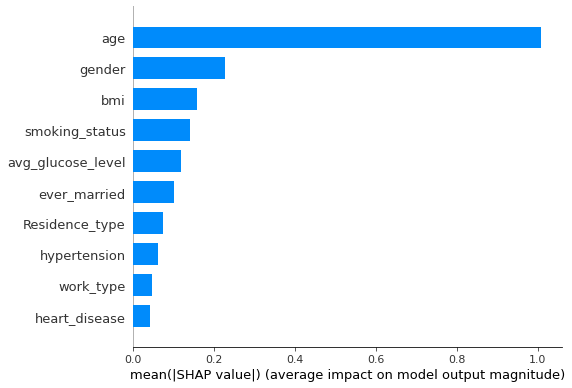

In [ ]:
shap.summary_plot(shap_values, x_train, feature_names=x_train.columns, plot_type="bar")

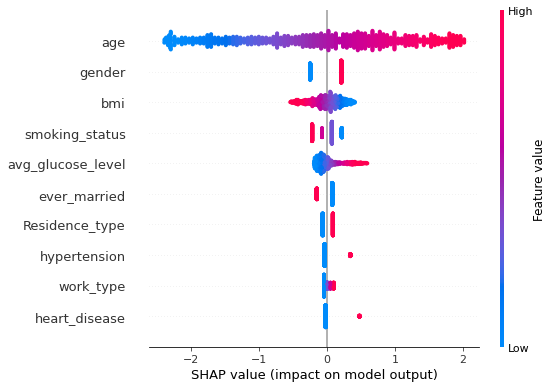

In [ ]:
shap.summary_plot(shap_values, X_test_array, feature_names=features)


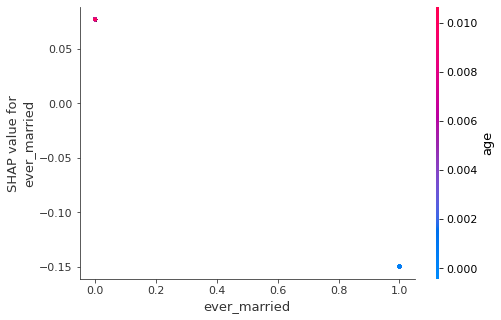

In [ ]:
shap.dependence_plot(4, shap_values, xt, feature_names=features)

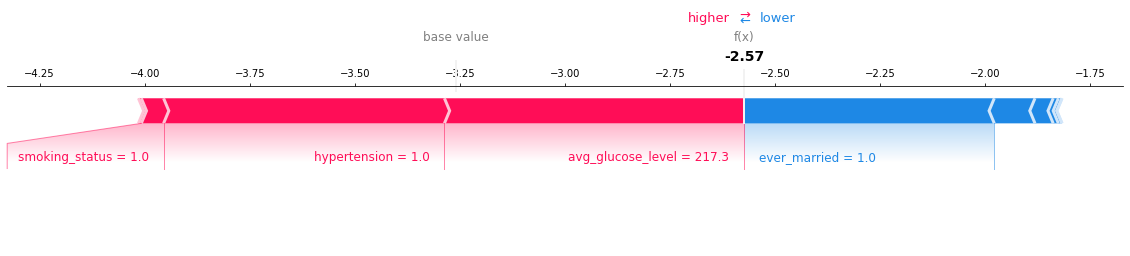

In [ ]:
ind = 764
shap.force_plot(
    explainer.expected_value, shap_values[ind,:], X_test_array[ind,:],
    feature_names=features, matplotlib=True
)

In [ ]:
# visualize the first 5 predictions explanations with a dark red dark blue color map.
shap.force_plot(explainer.expected_value, shap_values[0:5,:], xtest[0:5,:], plot_cmap="DrDb", feature_names=features, matplotlib=True)

NotImplementedError: ignored

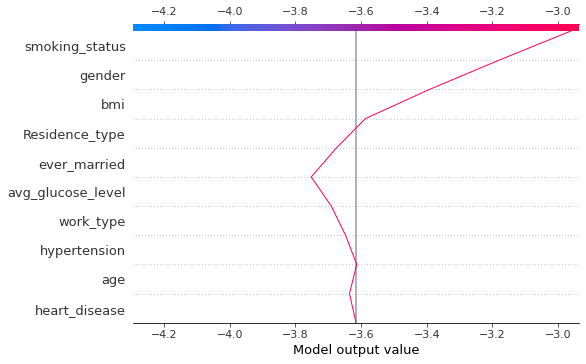

In [ ]:
shap.decision_plot(explainer.expected_value, shap_values[0], feature_names = list(features))

In [ ]:
ytest = y_test.to_numpy()

In [ ]:
ytest[764]

0

In [ ]:
import lime
import lime.lime_tabular
from __future__ import print_function

predict_fn_logreg = lambda x: logistic.predict_proba(x).astype(float)

In [ ]:
explainer = lime.lime_tabular.LimeTabularExplainer(xt ,feature_names = features)

# Pick the observation in the validation set for which explanation is required
observation_1 = 2
exp = explainer.explain_instance(X_test_array[observation_1], predict_fn_logreg, num_features=6)
exp.show_in_notebook(show_all=False)

X does not have valid feature names, but LogisticRegression was fitted with feature names


In [ ]:
print(ytest[observation_1])

0


In [ ]:
y_test.head(50)

625     0
83      1
724     0
3248    0
2828    0
651     0
3780    0
3682    0
1183    0
3721    0
690     0
1624    0
3909    0
3195    0
1881    0
687     0
4705    0
3413    0
3348    0
1641    0
3613    0
860     0
3775    0
3133    0
4606    0
4059    0
183     1
3098    0
1102    0
591     0
1152    0
3202    0
323     0
61      1
3856    0
1545    0
3454    0
1055    0
3773    0
2112    0
4624    0
4238    0
2009    0
665     0
2275    0
4408    0
3912    0
3093    0
3861    0
3365    0
Name: stroke, dtype: int64

In [ ]:
# Pick the observation in the validation set for which explanation is required
observation_2 = 26

# Get the explanation for Logistic Regression
exp = explainer.explain_instance(X_test_array[observation_2], predict_fn_logreg, num_features=6)
exp.show_in_notebook(show_all=False)

X does not have valid feature names, but LogisticRegression was fitted with feature names


In [ ]:
print(ytest[observation_2])

1


In [ ]:
logisticRes = training('Logistic Regression', logistic)
rfRes = training('Random Forest', rf)
GaussianNBRes = training('Gaussian Naive Bias', gNB)
SDCRes = training('gradient descent (SGD) ', SDC)

In [ ]:
print(logisticRes)
print(rfRes)
print(GaussianNBRes)
print(SDCRes)

ModelName: Logistic Regression Accuracy:  94.98%
ModelName: Random Forest Accuracy:  94.78%
ModelName: Gaussian Naive Bias Accuracy:  87.36%
ModelName: gradient descent (SGD)  Accuracy:  94.98%


In [ ]:

from sklearn import datasets, linear_model
regr = linear_model.LinearRegression()

regr.fit(x_train, y_train)

LinearRegression()

In [ ]:
diabetes_y_pred = regr.predict(diabetes_X_test)
print(diabetes_X_test[1])
print(diabetes_y_pred[1])

In [ ]:
lr2 = LogisticRegression(random_state=0, tol=1e-6)

In [ ]:
logisticRes2 = training('Logistic Regression with more tolarance', logistic)
print(logisticRes2)

In [ ]:
logistic.predict([[0, 23, 0, 0, 1, 3, 0, 106, 23, 2]])
